# Statistical Learning

## Unsupervised Learning - Cluster Analysis


### k-means
 


In [1]:
#### Installing and loading required libraries
if(!require(fpc)) install.packages("fpc")
if(!require(dbscan)) install.packages("dbscan")
if(!require(devtools)) install.packages("devtools")
devtools::install_github("kassambara/factoextra")


Loading required package: fpc

Loading required package: dbscan


Attaching package: ‘dbscan’


The following object is masked from ‘package:fpc’:

    dbscan


Loading required package: devtools

Loading required package: usethis




dendextend (1.12.0    -> 1.13.2   ) [CRAN]
FactoMineR (1.42      -> 2.0      ) [CRAN]
ggpubr     (NA        -> 0.2.4    ) [CRAN]
tidyr      (0.8.3     -> 1.0.0    ) [CRAN]
digest     (0.6.20    -> 0.6.23   ) [CRAN]
rlang      (0.4.0     -> 0.4.2    ) [CRAN]
scales     (1.0.0     -> 1.1.0    ) [CRAN]
car        (3.0-3     -> 3.0-5    ) [CRAN]
ggsci      (NA        -> 2.9      ) [CRAN]
purrr      (0.3.2     -> 0.3.3    ) [CRAN]
cowplot    (NA        -> 1.0.0    ) [CRAN]
ggsignif   (NA        -> 0.6.0    ) [CRAN]
plyr       (1.8.4     -> 1.8.5    ) [CRAN]
Rcpp       (1.0.2     -> 1.0.3    ) [CRAN]
ellipsis   (0.2.0.1   -> 0.3.0    ) [CRAN]
vctrs      (0.2.0     -> 0.2.1    ) [CRAN]
lifecycle  (NA        -> 0.1.0    ) [CRAN]
farver     (NA        -> 2.0.1    ) [CRAN]
R6         (2.4.0     -> 2.4.1    ) [CRAN]
cli        (1.1.0     -> 2.0.0    ) [CRAN]
pkgconfig  (2.0.2     -> 2.0.3    ) [CRAN]
backports  (1.1.4     -> 1.1.5    ) [CRAN]
carData    (3.0-2     -> 3.0-3    ) [CRAN]
quantreg   

Installing 34 packages: dendextend, FactoMineR, ggpubr, tidyr, digest, rlang, scales, car, ggsci, purrr, cowplot, ggsignif, plyr, Rcpp, ellipsis, vctrs, lifecycle, farver, R6, cli, pkgconfig, backports, carData, quantreg, maptools, RcppEigen, sp, SparseM, haven, curl, data.table, openxlsx, hms, BH

Installing packages into ‘/home/dsuser03/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpnsvFfC/remotes2ae5927fe63/kassambara-factoextra-9efe26c/DESCRIPTION’
─  preparing ‘factoextra’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘factoextra_1.0.6.999.tar.gz’
   


Installing package into ‘/home/dsuser03/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



In [10]:
### Data: iris
iris <- iris

set.seed(1)
### run the k-means algorinth on the data using three clusters
kmodel <- kmeans(x = as.matrix(iris[,1:4]), centers = 3)


In [9]:
table(kmodel$cluster)


 1  2  3 
62 38 50 

In [6]:
table(cluster=kmodel$cluster, species=iris$Species)

       species
cluster setosa versicolor virginica
      1     50          0         0
      2      0          2        36
      3      0         48        14

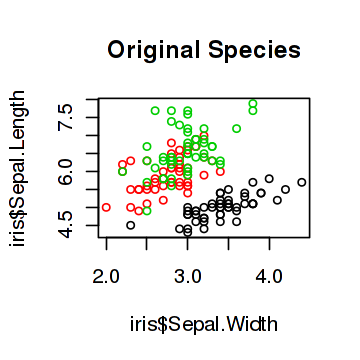

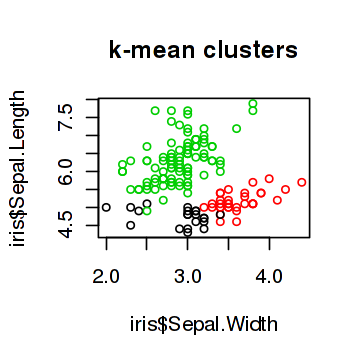

In [28]:
options(repr.plot.width = 3, repr.plot.height = 3)

plot(iris$Sepal.Length ~ iris$Sepal.Width, col=iris$Species, main="Original Species", cex=0.7)
plot(iris$Sepal.Length ~ iris$Sepal.Width, col=kmodel$cluster, main="k-mean clusters", cex=0.7)

The algorithm of k-means is sensible to the initially selected random points. By changing the starting points (nstart) we can get a better or worst model:

In [14]:
kmodel <- kmeans(x = as.matrix(iris[,1:4]), centers = 3, nstart=30)
table(kmodel$cluster)


 1  2  3 
38 62 50 

In [15]:
table(cluster=kmodel$cluster, species=iris$Species)

       species
cluster setosa versicolor virginica
      1      0          2        36
      2      0         48        14
      3     50          0         0

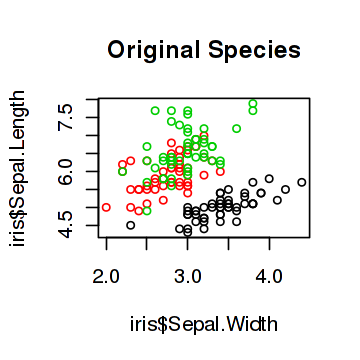

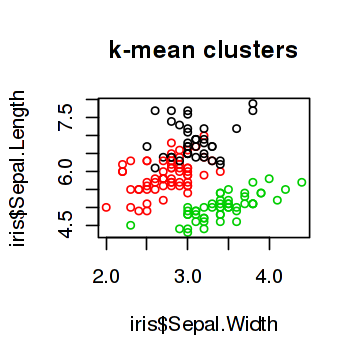

In [25]:
plot(iris$Sepal.Length ~ iris$Sepal.Width, col=iris$Species, main="Original Species", cex=0.7)
plot(iris$Sepal.Length ~ iris$Sepal.Width, col=kmodel$cluster, main="k-mean clusters", cex=0.7)

### Hierarchical clustering
 


In [11]:
hcmodel <- hclust(d=dist(as.matrix(iris[,1:4])))
hcmodel


Call:
hclust(d = dist(as.matrix(iris[, 1:4])))

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 150 


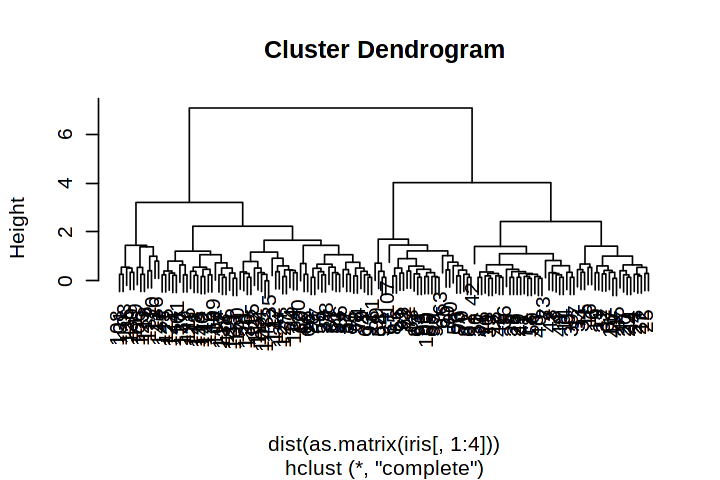

In [12]:
options(repr.plot.width = 6, repr.plot.height = 4)
plot(hcmodel)

In [14]:
hcmod_clusters <- cutree(hcmodel, 3)
table(hcmod_clusters)

table(iris$Species, clusters=hcmod_clusters)

hcmod_clusters
 1  2  3 
50 72 28 

            clusters
              1  2  3
  setosa     50  0  0
  versicolor  0 23 27
  virginica   0 49  1

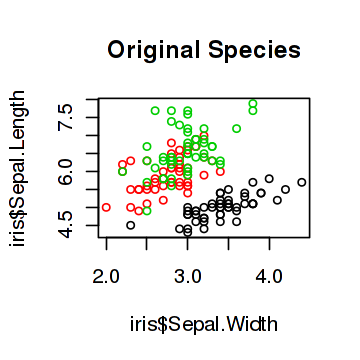

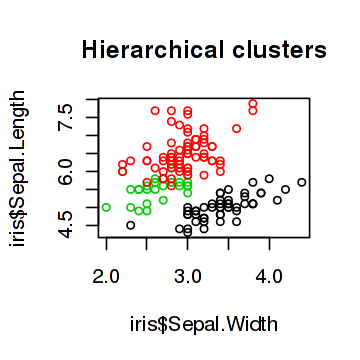

In [30]:
options(repr.plot.width = 3, repr.plot.height = 3)

plot(iris$Sepal.Length ~ iris$Sepal.Width, col=iris$Species, main="Original Species", cex=0.7)
plot(iris$Sepal.Length ~ iris$Sepal.Width, col=hcmod_clusters, main="Hierarchical clusters", cex=0.7)

### Gaussian mixture models
 


In [15]:
library(mclust)

### Mclust: implementation of gaussian mixture model
mcl_model <- Mclust(iris[, 1:4], 3)

summary(mcl_model)


Package 'mclust' version 5.4.5
Type 'citation("mclust")' for citing this R package in publications.



---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 3 components: 

 log-likelihood   n df       BIC       ICL
       -186.074 150 38 -562.5522 -566.4673

Clustering table:
 1  2  3 
50 45 55 

In [16]:
table(iris$Species, clusters=mcl_model$classification)

            clusters
              1  2  3
  setosa     50  0  0
  versicolor  0 45  5
  virginica   0  0 50

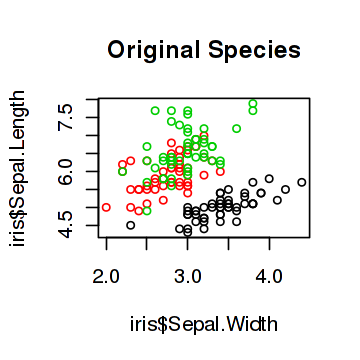

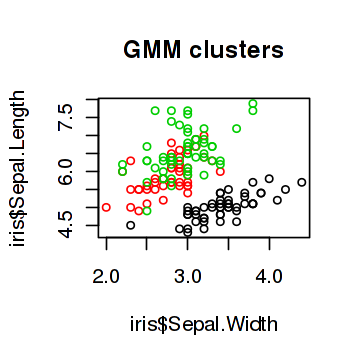

In [38]:
options(repr.plot.width = 3, repr.plot.height = 3)

plot(iris$Sepal.Length ~ iris$Sepal.Width, col=iris$Species, main="Original Species", cex=0.7)
plot(iris$Sepal.Length ~ iris$Sepal.Width, col=mcl_model$classification, main="GMM clusters", cex=0.7)

### DBSCAN
 

In [64]:
### install.packages("dbscan")
library("fpc")
library("dbscan")


### create a dbscan cluster
dbscan_mod <- dbscan(iris[,1:4],eps=0.5, MinPts = 10 )

In [65]:
summary(dbscan_mod$cluster)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    1.00    1.00    1.28    2.00    2.00 

In [66]:
table(iris$Species, clusters=dbscan_mod$cluster)

            clusters
              0  1  2
  setosa      2 48  0
  versicolor  6  0 44
  virginica  22  0 28

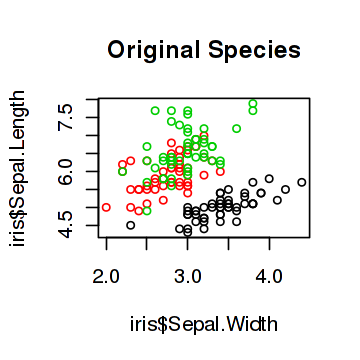

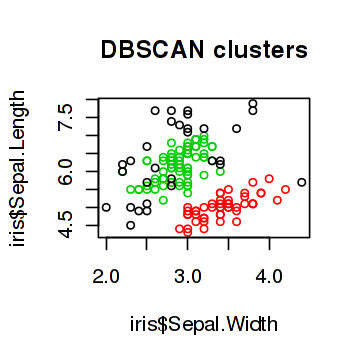

In [68]:
options(repr.plot.width = 3, repr.plot.height = 3)

plot(iris$Sepal.Length ~ iris$Sepal.Width, col=iris$Species, main="Original Species", cex=0.7)
plot(iris$Sepal.Length ~ iris$Sepal.Width, col=dbscan_mod$cluster+1, main="DBSCAN clusters", cex=0.7)

## DBSCAN and figure dataset
 
DBSCAN is specially useful when trying to capture figure patterns (e.g. in pictures, maps or drawings).
An example can be obtained from the multishapes dataset on the factoextra package

In [20]:
if(!require(devtools)) install.packages("devtools")
devtools::install_github("kassambara/factoextra")

library(factoextra)

Skipping install of 'factoextra' from a github remote, the SHA1 (9efe26c2) has not changed since last install.
  Use `force = TRUE` to force installation

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



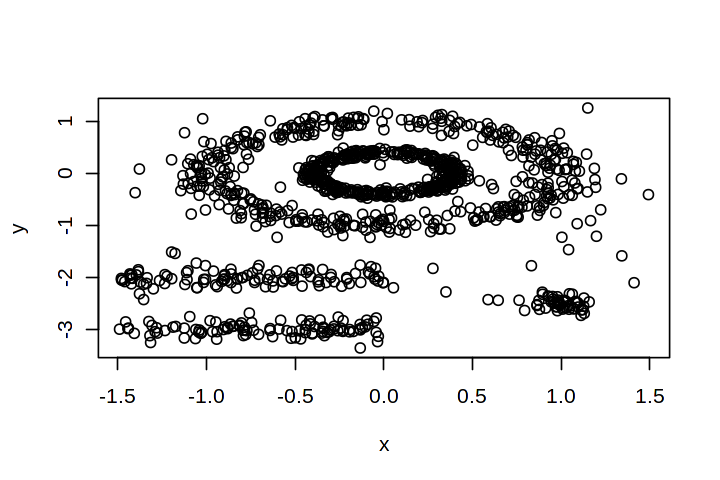

In [21]:
df <- multishapes[, 1:2]
set.seed(123)

plot(df)

Warning message in dbscan(df, eps = 0.15, MinPts = 10):
“converting argument MinPts (fpc) to minPts (dbscan)!”


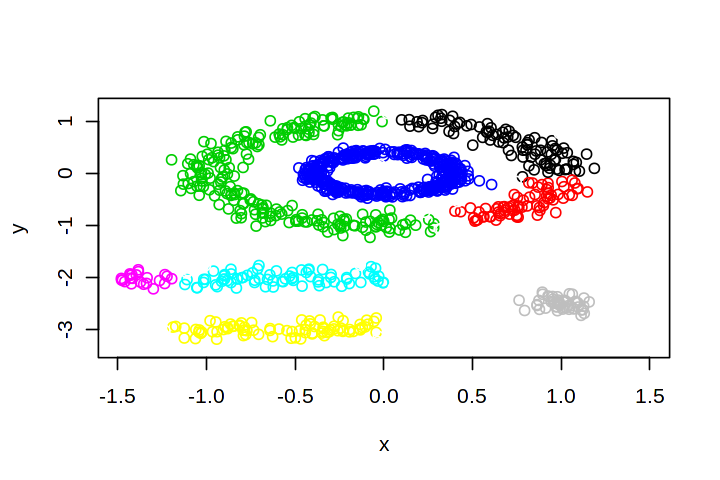

In [22]:
dbs_mod <- dbscan(df, eps = 0.15, MinPts = 10)
plot(df,col=dbs_mod$cluster)

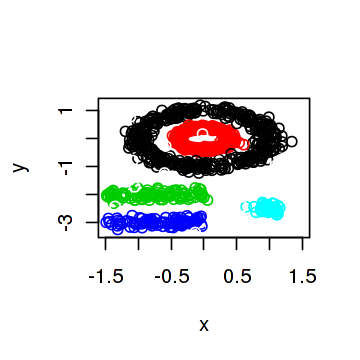

In [70]:
plot(df,col=dbs_mod$cluster)

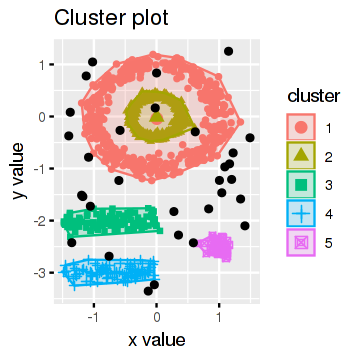

In [59]:
fviz_cluster(dbs_mod, df, stand = FALSE, geom = "point")

# Calculation of the optimal number of clusters
 
First we will use the empiric calculation:  k ≈ √n/2

In [23]:
k <- sqrt(nrow(iris)/2)

print(paste("The optimal number of clusters based on the empirical method is:",k))

[1] "The optimal number of clusters based on the empirical method is: 8.66025403784439"


Now we will use the elbow method:

In [24]:
### calculate the initial variance for the whole dataset (one cluster)
wss <- (nrow(iris)-1)*sum(apply(iris[,1:4],2,var))
wss


[1] 681.3706

In [25]:
### iterate for 2 to 15 clusters and calculate the sum of the within variance for each iteration
for (i in 2:15) wss[i] <- sum(kmeans(iris[,1:4],centers=i)$withinss)

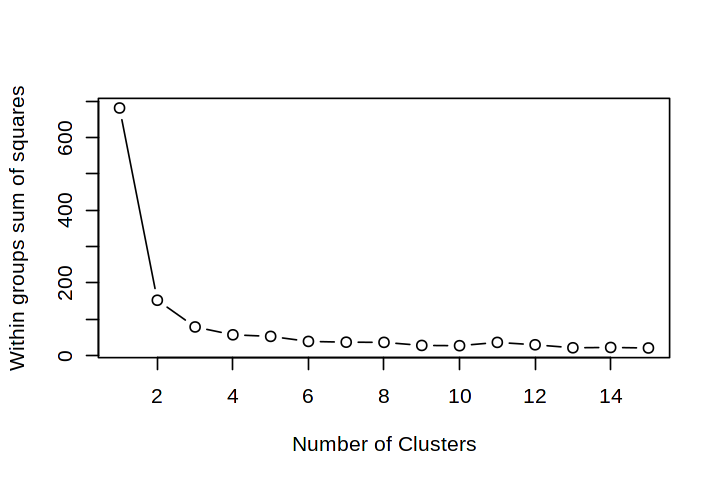

In [26]:
### Now plot the elbow plot
plot(1:15, wss, type="b", xlab="Number of Clusters",ylab="Within groups sum of squares")

Now we will proceed with the NbClust algorithm:

In [33]:
library(NbClust)

res <- NbClust(iris[,1:4], distance = "euclidean", min.nc=2, max.nc=8, method = "complete")


ERROR: Error in library(NbClust): there is no package called ‘NbClust’


In [34]:
res$All.CriticalValues

ERROR: Error in eval(expr, envir, enclos): object 'res' not found


In [35]:
t(res$All.index)

ERROR: Error in t(res$All.index): object 'res' not found


In [29]:
t(res$Best.nc)

ERROR: Error in t(res$Best.nc): object 'res' not found


## External Evaluation of the clusters

Pairwise measures - Confusion matrix ( TP,TN,FP,FN )
- Jaccard index:  TP/(TP+FP+FN) 
- Rand measure:   TP+TN/(TP+FP+FN+TN)
- Fowlkes–Mallows index:   TP/√((TP+FP)(TP+FN)) 



In [89]:
### Confission matrix for kmeans
table(model=kmodel$cluster,observed=iris$Species)

     observed
model setosa versicolor virginica
    1     17          4         0
    2     33          0         0
    3      0         46        50

In [93]:
library('clusteval')

jaccard <- cluster_similarity(iris$Species, kmodel$cluster, similarity="jaccard", method="independence")
rand <- cluster_similarity(iris$Species, kmodel$cluster, similarity="rand", method="independence")

print(paste("Jaccard similarity index:",jaccard))
print(paste("Rand similarity measure:",rand))

[1] "Jaccard similarity index: 0.484858513983121"
[1] "Rand similarity measure: 0.721431767337808"


We can also use the clues package for the comparisson between cluster methods. Available indices are: “Rand”, “HA” (Hubert and Arabie’s adjusted Rand index), “MA” (Morey and Agresti’s adjusted Rand index), “FM” (Fowlkes and Mallows’s index), “Jaccard” (Jaccard index)

In [124]:
library(clues)

# k-means: kmodel$cluster
# hierarchical: hcmod_clusters
# Gaussian: mcl_model$classification
# DBSCAN: dbscan_mod$cluster
# Correct Species: iris$Species

clusters <- c("kmean","hierarchical","gaussian","dbscan","Species")

c1_2 <- adjustedRand(kmodel$cluster, hcmod_clusters)
c1_3 <- adjustedRand(kmodel$cluster, mcl_model$classification)
c1_4 <- adjustedRand(kmodel$cluster, dbscan_mod$cluster)
c2_3 <- adjustedRand(hcmod_clusters, mcl_model$classification)
c2_4 <- adjustedRand(hcmod_clusters, dbscan_mod$cluster)
c3_4 <- adjustedRand(mcl_model$classification, dbscan_mod$cluster)

In [123]:
print(paste(clusters[1],"vs",clusters[2]))
c1_2
print(paste(clusters[1],"vs",clusters[3]))
c1_3
print(paste(clusters[1],"vs",clusters[4]))
c1_4
print(paste(clusters[2],"vs",clusters[3]))
c2_3
print(paste(clusters[2],"vs",clusters[4]))
c2_4
print(paste(clusters[3],"vs",clusters[4]))
c3_4

[1] "kmean vs hierarchical"


Rand        HA        MA        FM   Jaccard 
0.7804922 0.5550910 0.5590258 0.7460462 0.5880772

[1] "kmean vs gaussian"


Rand        HA        MA        FM   Jaccard 
0.7272483 0.4447789 0.4500300 0.6719394 0.4939399

[1] "kmean vs dbscan"


Rand        HA        MA        FM   Jaccard 
0.7761969 0.5462145 0.5502519 0.7402410 0.5802987

[1] "hierarchical vs gaussian"


Rand        HA        MA        FM   Jaccard 
0.8622819 0.6985274 0.7021780 0.8055486 0.6724835

[1] "hierarchical vs dbscan"


Rand        HA        MA        FM   Jaccard 
0.7641163 0.4942502 0.4999174 0.6815736 0.5169507

[1] "gaussian vs dbscan"


Rand        HA        MA        FM   Jaccard 
0.7778076 0.5123177 0.5182719 0.6834222 0.5179577

## Internal evaluation of clusters

In [36]:
## Dunn
library(clValid)
dist_dunn <- dist(as.matrix(iris[,1:4]), method = "euclidean") 
dunn_value <- dunn(distance = dist_dunn, clusters = kmodel$cluster)  
dunn_value

Loading required package: cluster



[1] 0.09880739

In [37]:
## silhuete
library(clues)

tt <- get_Silhouette(as.matrix(iris[,1:4]), kmodel$cluster, disMethod = "Euclidean")
tt$avg.s

[1] 0.552819

# Principal Component Analysis
 


In [47]:
iris.pca <- prcomp(as.matrix(iris[,1:4]))
iris.pca

Standard deviations (1, .., p=4):
[1] 2.0562689 0.4926162 0.2796596 0.1543862

Rotation (n x k) = (4 x 4):
                     PC1         PC2         PC3        PC4
Sepal.Length  0.36138659 -0.65658877  0.58202985  0.3154872
Sepal.Width  -0.08452251 -0.73016143 -0.59791083 -0.3197231
Petal.Length  0.85667061  0.17337266 -0.07623608 -0.4798390
Petal.Width   0.35828920  0.07548102 -0.54583143  0.7536574

In [48]:
### Variance of the principal components
pca.var <- iris.pca$sdev^2

### Percent of the variability attributed to each principal component
pca.varpct <- pca.var/sum(pca.var)


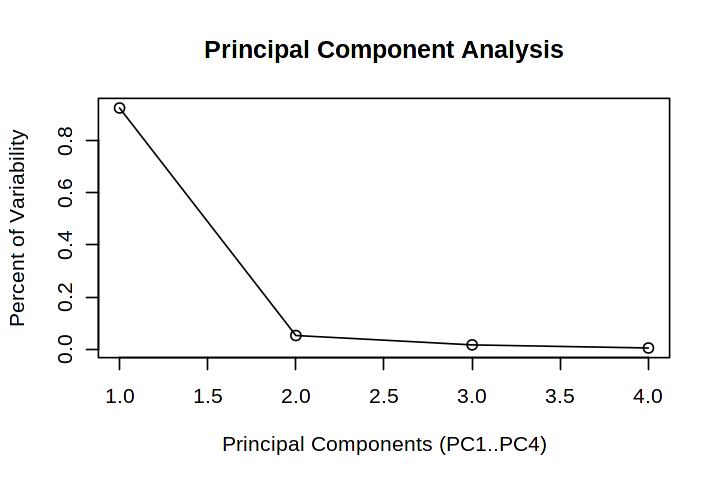

In [49]:
### Variability for each of the principal components
plot(pca.varpct, type="o", xlab="Principal Components (PC1..PC4)", 
     ylab="Percent of Variability",main="Principal Component Analysis")

The graph shows that the two first components account for most of the variability (higher than 90%).

In [43]:
## Cummulative sum of the variability percent
plot(cumsum(pca.varpct), type="o", xlab="Principal Components (PC1..PC4)", 
     ylab="Cummulative Percent of Variability",main="Principal Component Analysis")

ERROR: Error in plot(cumsum(pca.varpct), type = "o", xlab = "Principal Components (PC1..PC4)", : object 'pca.varpct' not found


The plot of the cummulative sum of the variance percent shows that the first two principal components account for 98% of the variance! 

In [44]:
### Plot of the first two components
plot(iris.pca$x)

ERROR: Error in plot(iris.pca$x): object 'iris.pca' not found


In [45]:
### Plot of the first two components coloring by species
plot(iris.pca$x, col=iris$Species)

ERROR: Error in plot(iris.pca$x, col = iris$Species): object 'iris.pca' not found


As we can appreciate, the PCA has the capacity to discriminate among the different species.
We can now search for the correlation between PC1 and PC2, and the iris variables:

In [46]:
pc12 <- data.frame(iris.pca$x)
head(pc12)


ERROR: Error in data.frame(iris.pca$x): object 'iris.pca' not found


In [148]:
library("Hmisc")

rcorr(as.matrix(cbind(iris[,1:4], pc12[,1:2])))

             Sepal.Length Sepal.Width Petal.Length Petal.Width   PC1   PC2
Sepal.Length         1.00       -0.12         0.87        0.82  0.90 -0.39
Sepal.Width         -0.12        1.00        -0.43       -0.37 -0.40 -0.83
Petal.Length         0.87       -0.43         1.00        0.96  1.00  0.05
Petal.Width          0.82       -0.37         0.96        1.00  0.97  0.05
PC1                  0.90       -0.40         1.00        0.97  1.00  0.00
PC2                 -0.39       -0.83         0.05        0.05  0.00  1.00

n= 150 


P
             Sepal.Length Sepal.Width Petal.Length Petal.Width PC1    PC2   
Sepal.Length              0.1519      0.0000       0.0000      0.0000 0.0000
Sepal.Width  0.1519                   0.0000       0.0000      0.0000 0.0000
Petal.Length 0.0000       0.0000                   0.0000      0.0000 0.5566
Petal.Width  0.0000       0.0000      0.0000                   0.0000 0.5533
PC1          0.0000       0.0000      0.0000       0.0000             1.0000


The correlation matrix shows that the first component (C1) has high correlation with all the variables, while the second component (C2) only is correlated Sepal Length and Width.